In [5]:
from graphviz import Digraph

In [6]:
class rtrie:
    def __init__(self,c , v = None , child = [None]*26 ): # c : caractere , v : valeur , child : liste des enfants
        self.c = c
        self.v = v
        self.children = child

In [7]:
class RTrie:
    def __init__(self):
        self.racine = None

    def TrieVide(self):
        return self.racine == None
    
    def lg(self , mot):
        return len(mot)
    
    def prem(self , mot): #retourne le caractere en int
        res = ord(mot[0])
        return res-97

    def reste(self , mot):
        return mot[1:]
    
    def EnfantSauf(self, A, i ):
        """retourne la liste des enfants de A sauf celui d'indice i"""
        if A is None:
            return []

        j=0
        res=[]
        print("enfant sauf ",type(A.children))
        for child in A.children:
            if j != i :
                res.append(child)
            j+=1
        return res

    
    def SousArbre(self, A, i):
        print("SOUS ARBRE ????????",A.c ," et ", A.v , " et len", len(A.children))
        if A.children[i] is None :
            print("SOUS ARBRE - Sous arbre vide")
            return None
        else:
            print("SOUS ARBRE - Sous arbre non vide")
            return rtrie(A.c, A.v, self.duplique(A.children[i]))


    def R_Trie(self, i , L , A):
        char = chr(i+97) # retourne le caractere en minuscule correspondant à l'entier
        res = rtrie(char)
        res.children = L
        if A is not None :
            res.children[i] = A
        return res
    

    def duplique(self, A):
        if A is None :
            return None
        else:
            print("DUPLIQUE - ",A.c ," et ", A.v , " et len", len(A.children))
            res = rtrie(A.c, A.v)
            for i in range(len(A.children)):
                res.children[i] = self.duplique(A.children[i])
            return res

    def ajouter(self, c , A , v ) : # c : cle , A : R-Trie , v : valeur
        if A is None :
            A = rtrie(c,v)
            
        if self.lg(c) == 1 :
            A.v = v
            return A
        
        p = self.prem(c)
        print("valeur de p :",p, " et v :", v, " et son type ", type(A.children))
        return self.R_Trie(p, self.EnfantSauf(A, p), self.ajouter(self.reste(c),self.SousArbre(A,p),v))
        
        
    def visualiser_arbre(self):
        dot = Digraph()

        def generer_graphique(arbre):
            if arbre is not None :
                dot.node(str(arbre.c) , label =f"{str(arbre.c)} {(str(arbre.v)) if arbre.v is not None else ''}")
                print("ARBRE ", type(arbre.children))
                for child in arbre.children:
                    if child is not None:
                        dot.node(str(child.c) , label =f"{str(child.c)} {(str(child.v)) if child.v is not None else ''}")
                        dot.edge(str(arbre.c) , str(child.c))
                        generer_graphique(child)

        generer_graphique(self.racine)
        return dot


valeur de p : 1  et v : 1  et son type  <class 'list'>
enfant sauf  <class 'list'>
SOUS ARBRE ???????? bonjour  et  1  et len 26
SOUS ARBRE - Sous arbre vide
valeur de p : 14  et v : 1  et son type  <class 'list'>
enfant sauf  <class 'list'>
SOUS ARBRE ???????? onjour  et  1  et len 26
SOUS ARBRE - Sous arbre vide
valeur de p : 13  et v : 1  et son type  <class 'list'>
enfant sauf  <class 'list'>
SOUS ARBRE ???????? njour  et  1  et len 26
SOUS ARBRE - Sous arbre vide
valeur de p : 9  et v : 1  et son type  <class 'list'>
enfant sauf  <class 'list'>
SOUS ARBRE ???????? jour  et  1  et len 26
SOUS ARBRE - Sous arbre vide
valeur de p : 14  et v : 1  et son type  <class 'list'>
enfant sauf  <class 'list'>
SOUS ARBRE ???????? our  et  1  et len 26
SOUS ARBRE - Sous arbre vide
valeur de p : 20  et v : 1  et son type  <class 'list'>
enfant sauf  <class 'list'>
SOUS ARBRE ???????? ur  et  1  et len 26
SOUS ARBRE - Sous arbre vide
--------------
ARBRE  <class 'list'>
ARBRE  <class 'list'>
ARBR

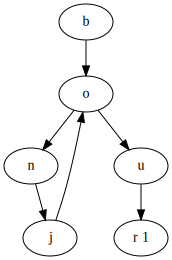

In [8]:
rt = RTrie()
rt.racine = rt.ajouter("bonjour", rt.racine , 1)
print("--------------")
#rt.racine = rt.ajouter("bonsoir", rt.racine , 2)
rt.visualiser_arbre()